# Теорема Байеса

Краткое напоминание:

$P(x, y) = P(x|y)P(y)$

Однако, так же:

$P(x, y) = P(y|x)P(x)$

Вывод:

$P(x|y) P(y) = P(y|x)P(x)$

Немного преобразований и теорема Байеса готова!:

$\large{P(x=b|y=a) = \frac{P(y=a|x=b)P(x=b)}{P(y=a)}}$

Запомнить названия:

- $P(x=b|y=a)$ - posterior или апостериорное
- $P(y=a|x=b)$ - likelihood или правдоподобие
- $P(x=b)$ - prior или априорное
- $P(y=a)$ - evidence или маргинальное


Вспомним о маргинализации:

$P(y=a) = \sum_{c}P(y=a|x=c)P(x=c)$

Тогда:

$\large{P(x=b|y=a) = \frac{P(y=a|x)P(x=b)}{\sum_{c}P(y=a|x=c)P(x=c)}}$

## COVID-19 Test

- $N_{sick} = 219000000$
- $N_{total} = 7731621621$

$$\large{P(test=1|sick=1) = 0.995}$$
$$\large{P(sick=1) = \frac{N_{sick}}{N_{total}} = 0.028}$$
$$\large{P(sick=1|test=1) = ?}$$
$$\large{P(sick=1|test=1) = \frac{P(test=1|sick=1)P(sick=1)}{P(test=1)}}$$
$$\large{P(sick=1|test=1) = \frac{0.995 * 0.028}{P(test=1)}}$$
$$\large{P(sick=1|test=1) = \frac{0.995 * 0.028}{P(test=1|sick=1)P(sick=1) + P(test=1|sick=0)P(sick=0)}}$$
$$\large{P(sick=1|test=1) = \frac{0.995 * 0.028}{0.995 * 0.028 + (1 - 0.995)(1 - 0.028))}}$$
$$\large{P(sick=1|test=1) = 0.85}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

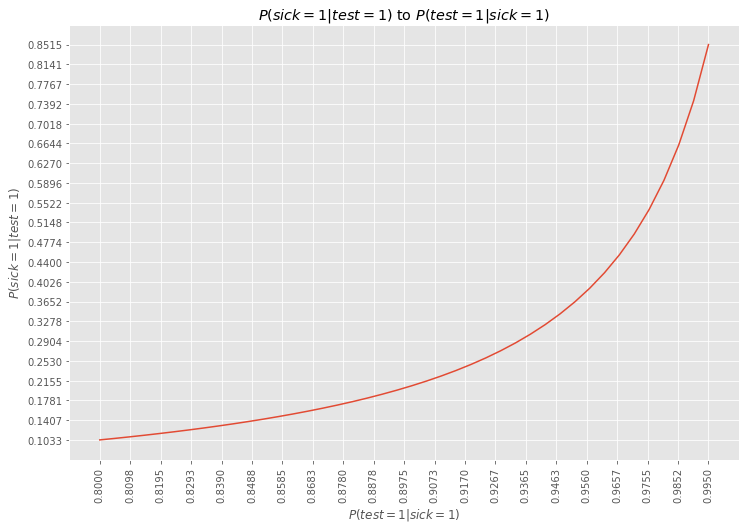

In [10]:
plt.style.use('ggplot')

p_s = 0.028
p_ns = 1 - p_s
p_ts = np.linspace(0.8, 0.995, 42)
p_tns = 1 - p_ts
p_st = p_ts * p_s / (p_ts * p_s + p_tns * p_ns)

fig, ax = plt.subplots()
fig.set_figwidth(12);
fig.set_figheight(8);
ax.set_title("$P(sick=1|test=1)$ to $P(test=1|sick=1)$");
ax.set_xticks(np.linspace(0.8, 0.995, 21));
ax.xaxis.set_tick_params(rotation=90);
ax.set_yticks(np.linspace(p_st.min(), p_st.max(), 21));
ax.set_ylabel("$P(sick=1|test=1)$");
ax.set_xlabel("$P(test=1|sick=1)$");
ax.plot(p_ts, p_st);